! Important: You should run this code on kaggle with TPU accelerator to avoid memory issues.

! add this kaggle dataset input: https://www.kaggle.com/datasets/phatvucoder/bkai2024

In [11]:
!rm -rf /kaggle/working/*
!mkdir bkgr moving_mask fixed_mask bkgr_mask

Image dimensions: 1280x720, Color channels: 3


100%|██████████| 1352/1352 [00:20<00:00, 66.56it/s]


Calculating pixel median for background...
Calculating standard deviation for each pixel...
Generating masks based on standard deviation threshold...
Background image saved at: bkgr/background_01.jpg
Fixed region mask saved at: fixed_mask/fmask01.png
Moving region mask saved at: moving_mask/mmask01.png
Masked background saved at: bkgr_mask/bkgr01.jpg


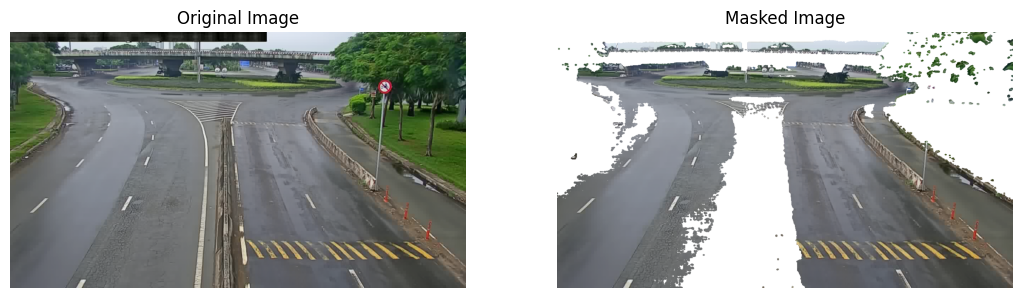

Memory cleared after processing cam_01.
Image dimensions: 1280x720, Color channels: 3


100%|██████████| 1000/1000 [00:15<00:00, 63.15it/s]


Calculating pixel median for background...
Calculating standard deviation for each pixel...
Generating masks based on standard deviation threshold...
Background image saved at: bkgr/background_02.jpg
Fixed region mask saved at: fixed_mask/fmask02.png
Moving region mask saved at: moving_mask/mmask02.png
Masked background saved at: bkgr_mask/bkgr02.jpg


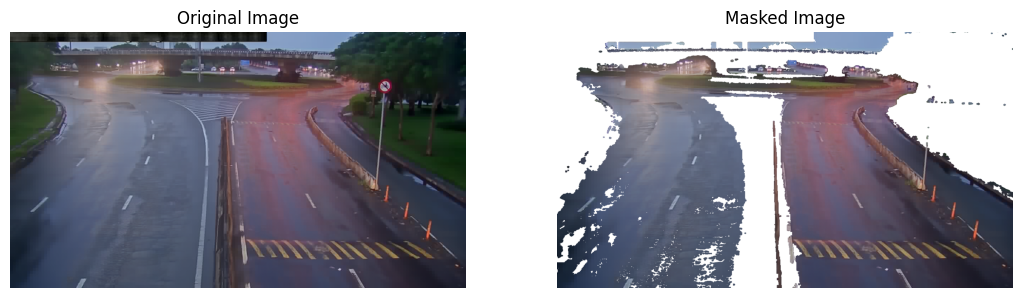

Memory cleared after processing cam_02.
Image dimensions: 1280x720, Color channels: 3


100%|██████████| 1987/1987 [00:33<00:00, 59.86it/s]


Calculating pixel median for background...
Calculating standard deviation for each pixel...
Generating masks based on standard deviation threshold...
Background image saved at: bkgr/background_03.jpg
Fixed region mask saved at: fixed_mask/fmask03.png
Moving region mask saved at: moving_mask/mmask03.png
Masked background saved at: bkgr_mask/bkgr03.jpg


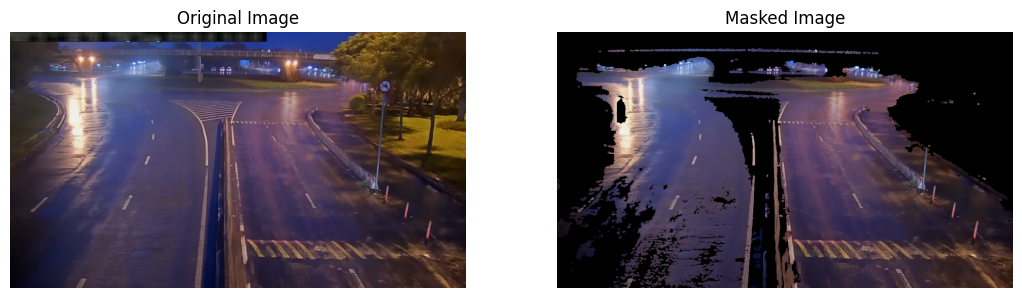

Memory cleared after processing cam_03.
Image dimensions: 1280x720, Color channels: 3


100%|██████████| 1040/1040 [00:16<00:00, 61.95it/s]


Calculating pixel median for background...
Calculating standard deviation for each pixel...
Generating masks based on standard deviation threshold...
Background image saved at: bkgr/background_04.jpg
Fixed region mask saved at: fixed_mask/fmask04.png
Moving region mask saved at: moving_mask/mmask04.png
Masked background saved at: bkgr_mask/bkgr04.jpg


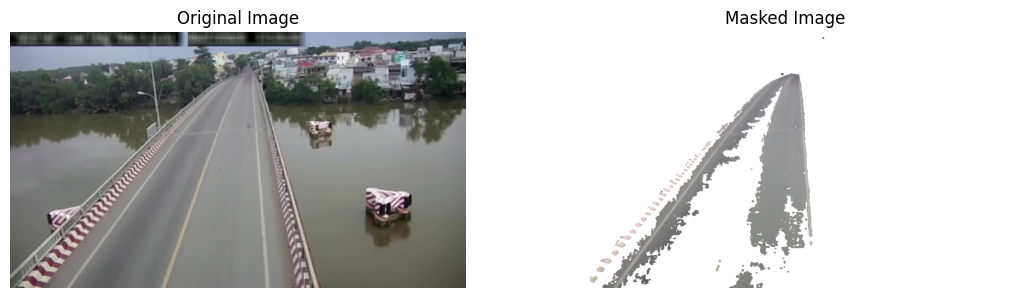

Memory cleared after processing cam_04.
Image dimensions: 1280x720, Color channels: 3


100%|██████████| 1643/1643 [00:27<00:00, 60.21it/s]


Calculating pixel median for background...
Calculating standard deviation for each pixel...
Generating masks based on standard deviation threshold...
Background image saved at: bkgr/background_05.jpg
Fixed region mask saved at: fixed_mask/fmask05.png
Moving region mask saved at: moving_mask/mmask05.png
Masked background saved at: bkgr_mask/bkgr05.jpg


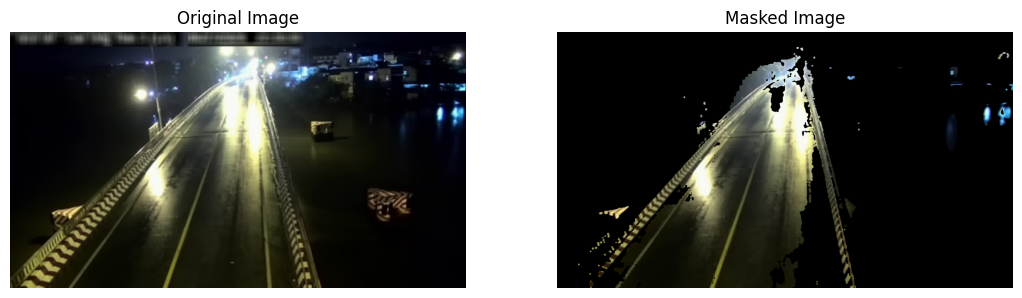

Memory cleared after processing cam_05.
Image dimensions: 1280x720, Color channels: 3


100%|██████████| 1000/1000 [00:16<00:00, 61.13it/s]


Calculating pixel median for background...
Calculating standard deviation for each pixel...
Generating masks based on standard deviation threshold...
Background image saved at: bkgr/background_06.jpg
Fixed region mask saved at: fixed_mask/fmask06.png
Moving region mask saved at: moving_mask/mmask06.png
Masked background saved at: bkgr_mask/bkgr06.jpg


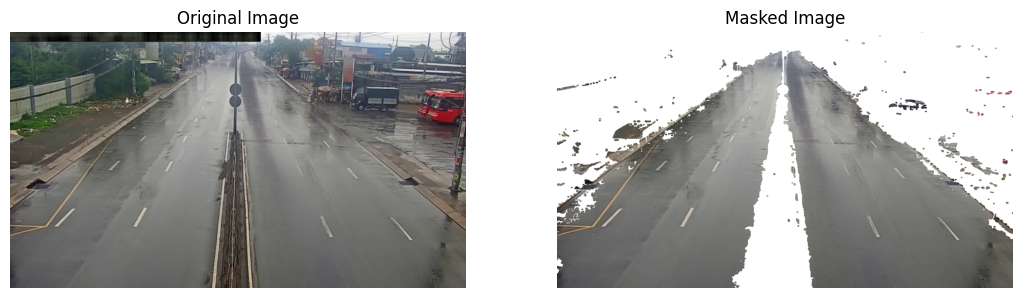

Memory cleared after processing cam_06.
Image dimensions: 1280x720, Color channels: 3


100%|██████████| 1000/1000 [00:16<00:00, 60.24it/s]


Calculating pixel median for background...
Calculating standard deviation for each pixel...
Generating masks based on standard deviation threshold...
Background image saved at: bkgr/background_07.jpg
Fixed region mask saved at: fixed_mask/fmask07.png
Moving region mask saved at: moving_mask/mmask07.png
Masked background saved at: bkgr_mask/bkgr07.jpg


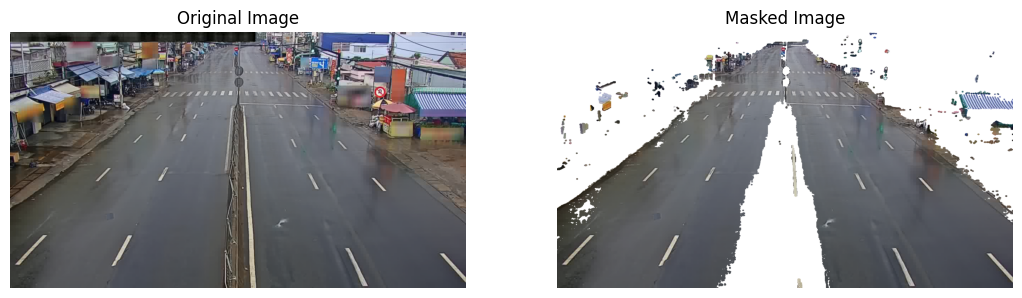

Memory cleared after processing cam_07.
Image dimensions: 1280x720, Color channels: 3


100%|██████████| 999/999 [00:16<00:00, 60.09it/s]


Calculating pixel median for background...
Calculating standard deviation for each pixel...
Generating masks based on standard deviation threshold...
Background image saved at: bkgr/background_08.jpg
Fixed region mask saved at: fixed_mask/fmask08.png
Moving region mask saved at: moving_mask/mmask08.png
Masked background saved at: bkgr_mask/bkgr08.jpg


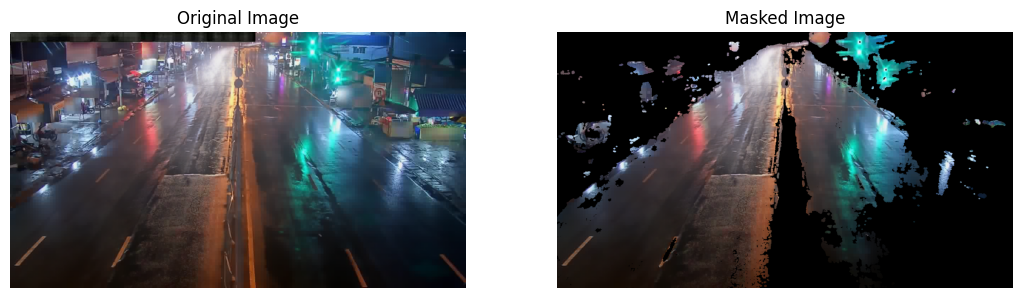

Memory cleared after processing cam_08.
Image dimensions: 1280x720, Color channels: 3


100%|██████████| 1000/1000 [00:16<00:00, 61.61it/s]


Calculating pixel median for background...
Calculating standard deviation for each pixel...
Generating masks based on standard deviation threshold...
Background image saved at: bkgr/background_09.jpg
Fixed region mask saved at: fixed_mask/fmask09.png
Moving region mask saved at: moving_mask/mmask09.png
Masked background saved at: bkgr_mask/bkgr09.jpg


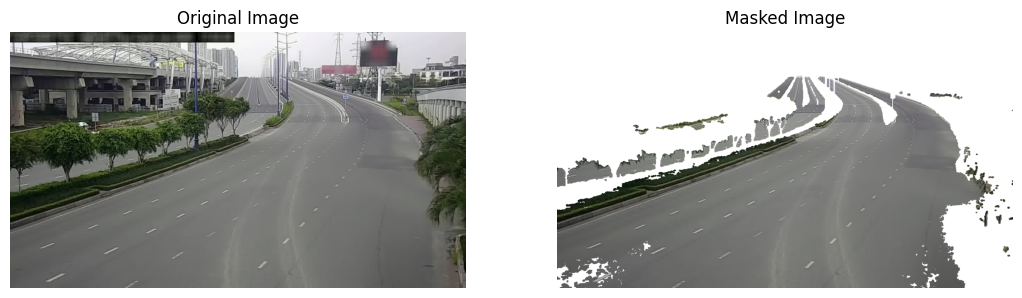

Memory cleared after processing cam_09.
Image dimensions: 1280x720, Color channels: 3


100%|██████████| 500/500 [00:08<00:00, 61.11it/s]


Calculating pixel median for background...
Calculating standard deviation for each pixel...
Generating masks based on standard deviation threshold...
Background image saved at: bkgr/background_10.jpg
Fixed region mask saved at: fixed_mask/fmask10.png
Moving region mask saved at: moving_mask/mmask10.png
Masked background saved at: bkgr_mask/bkgr10.jpg


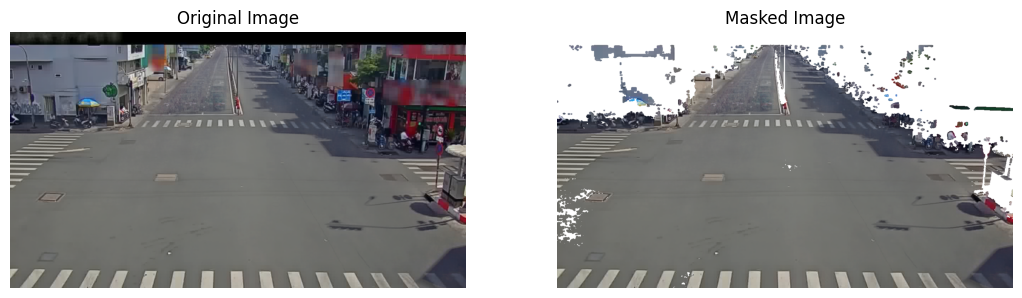

Memory cleared after processing cam_10.


In [13]:
import cv2
import numpy as np
import os
from typing import List, Tuple
import glob
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm

def create_background_and_masks(lst_img: List[str], output_background: str, output_fixed_mask: str, output_moving_mask: str, output_bkgr_mask:str, mode: str, std_threshold: float = 20.0) -> None:
    """
    Create a background image and masks for fixed and moving regions from a list of image paths.

    :param lst_img: List of paths to the images.
    :param output_background: Path to save the resulting background image.
    :param output_fixed_mask: Path to save the fixed region mask.
    :param output_moving_mask: Path to save the moving region mask.
    :param std_threshold: Threshold for standard deviation to determine moving regions.
    """
    if not lst_img:
        raise ValueError("Empty image path list.")

    # Read first image to get dimensions and color channels
    first_image = cv2.imread(lst_img[0])
    if first_image is None:
        raise FileNotFoundError(f"Cannot read image: {lst_img[0]}")
    
    height, width, channels = first_image.shape
    print(f"Image dimensions: {width}x{height}, Color channels: {channels}")

    # Initialize arrays to store all frames and compute sum and sum of squares for variance calculation
    image_stack = np.zeros((len(lst_img), height, width, channels), dtype=np.float32)

    for idx, img_path in enumerate(tqdm(lst_img)):
        img = cv2.imread(img_path)
        if img is None:
            raise FileNotFoundError(f"Cannot read image: {img_path}")
        if img.shape != first_image.shape:
            raise ValueError(f"Image {img_path} has different dimensions than the first image.")
        image_stack[idx] = img.astype(np.float32)

    print("Calculating pixel median for background...")
    # Calculate median along time axis (axis=0)
    median_image = np.median(image_stack, axis=0).astype(np.uint8)

    print("Calculating standard deviation for each pixel...")
    # Calculate standard deviation along time axis
    std_image = np.std(image_stack, axis=0).astype(np.float32)

    # Convert to grayscale for mask generation
    median_gray = cv2.cvtColor(median_image, cv2.COLOR_BGR2GRAY)
    std_gray = cv2.cvtColor(std_image.astype(np.uint8), cv2.COLOR_BGR2GRAY)

    print("Generating masks based on standard deviation threshold...")
    # Apply threshold to standard deviation image to get moving regions
    _, moving_mask = cv2.threshold(std_gray, std_threshold, 255, cv2.THRESH_BINARY)
    # Fixed regions are inverse of moving regions
    fixed_mask = cv2.bitwise_not(moving_mask)

    # Optionally, apply morphological operations to clean up the masks
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    moving_mask = cv2.morphologyEx(moving_mask, cv2.MORPH_OPEN, kernel)
    fixed_mask = cv2.morphologyEx(fixed_mask, cv2.MORPH_OPEN, kernel)

    # convert mask to rgb
    moving_mask = cv2.cvtColor(moving_mask, cv2.COLOR_GRAY2BGR)
    
    # Apply mask
    if mode == "white_bkgr":
        masked_image = np.where(moving_mask == 0, 255, median_image)
    else:
        masked_image = np.where(moving_mask == 0, 0, median_image)

    # Save the background and masks
    cv2.imwrite(output_background, median_image)
    cv2.imwrite(output_fixed_mask, fixed_mask)
    cv2.imwrite(output_moving_mask, moving_mask)
    cv2.imwrite(output_bkgr_mask, masked_image)
    print(f"Background image saved at: {output_background}")
    print(f"Fixed region mask saved at: {output_fixed_mask}")
    print(f"Moving region mask saved at: {output_moving_mask}")
    print(f"Masked background saved at: {output_bkgr_mask}")

    # Optionally, visualize the result
    # Display results
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(median_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(moving_mask, cv2.COLOR_BGR2RGB))
    plt.title("Moving Mask")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.title("Masked Image")
    plt.axis('off')
    
    plt.show()

def get_image_list(cam: str, data_path: str) -> List[str]:
    """
    Get a sorted list of image paths for a specific camera.

    :param cam: Camera identifier (e.g., "cam_06").
    :param data_path: Path to the directory containing images.
    :return: Sorted list of image file paths.
    """
    pattern = os.path.join(data_path, f"{cam}*.jpg")
    lst_img = sorted(glob.glob(pattern))
    if not lst_img:
        raise FileNotFoundError(f"No images found for pattern: {pattern}")
    return lst_img

if __name__ == "__main__":
    for i in range(1, 11):
        cam = f"cam_{str(i).zfill(2)}"
        mode="white_bkgr"
        try:
            data_dir = "/kaggle/input/bkai2024/daytime"
            lst_img = get_image_list(cam, data_dir)
        except:
            data_dir = "/kaggle/input/bkai2024/nighttime"
            lst_img = get_image_list(cam, data_dir)
            mode="black_bkgr"
        
        # Define output paths
        output_background = f"bkgr/background_{str(i).zfill(2)}.jpg"
        output_fixed_mask = f"fixed_mask/fmask{str(i).zfill(2)}.png"
        output_moving_mask = f"moving_mask/mmask{str(i).zfill(2)}.png"
        output_bkgr_mask = f"bkgr_mask/bkgr{str(i).zfill(2)}.jpg"
    
        # Set standard deviation threshold (tuning might be required based on your data)
        std_threshold = 20.0
    
        create_background_and_masks(
            lst_img=lst_img,
            output_background=output_background,
            output_fixed_mask=output_fixed_mask,
            output_moving_mask=output_moving_mask,
            output_bkgr_mask=output_bkgr_mask,
            mode=mode,
            std_threshold=std_threshold,
        )
        # Clear the memory after processing each camera
        del lst_img  # Delete the list of image paths
        gc.collect()  # Force garbage collection
        print(f"Memory cleared after processing {cam}.")

In [17]:
!apt-get update && apt-get install -y zip
!zip -r processed_data.zip ./*

Get:1 http://deb.debian.org/debian bookworm InRelease [151 kB]
Get:2 http://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Get:3 http://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
Get:4 http://deb.debian.org/debian bookworm/main amd64 Packages [8789 kB]
Get:5 http://deb.debian.org/debian-security bookworm-security/main amd64 Packages [204 kB]
Fetched 9247 kB in 1s (6449 kB/s)                        
Reading package lists... Done
N: Repository 'http://deb.debian.org/debian bookworm InRelease' changed its 'Version' value from '12.7' to '12.8'
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  zip
0 upgraded, 1 newly installed, 0 to remove and 44 not upgraded.
Need to get 230 kB of archives.
After this operation, 631 kB of additional disk space will be used.
Get:1 http://deb.debian.org/debian bookworm/main amd64 zip amd64 3.0-13 [230 kB]
Fetched 230 kB in 0s (

In [18]:
from IPython.display import FileLink

file_path = 'processed_data.zip'
FileLink(file_path)

/kaggle/working/processed_data.zip